# Preprocesamiento

En esta cuarta etapa se van a tomar decisiones en línea con las estadísticas y análisis con tal de  preparar correctamente los datos que serán parte del entrenamiento y posterior validación de los modelos de predicción.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from nilmtk import DataSet
import warnings
from nilmtk import TimeFrame
warnings. filterwarnings("ignore")
plt.style.use('bmh')



In [2]:
#dataset de referencia 
deps = DataSet('dsualmh.h5')

elec=deps.buildings[1].elec # Todos los medidores

labels = pd.DataFrame({'Instances': list(range(1,7)),
                       'Meters': ['Main', 'Fan', 'Freezer', 'Television','Vacuum Cleaner', 'Boiler']})
Meters={}
for x in range(len(labels)): Meters[elec[x+1]]=labels['Meters'][x]

## Cambio en el muestreo de datos e interpolación

Veamos si hay  seccion faltante

In [3]:
tf=elec[1].good_sections(full_results=True).combined()[0]
tf

TimeFrame(start='2022-02-02 10:16:17+01:00', end='2022-02-02 12:58:00+01:00', empty=False)

 Muestreo cada 10 segundos, promediando datos (mean)  y usando metodo relleno=ffill

In [4]:
ta = '2022-02-02 10:16:00+01:00'
tb = '2022-02-02 12:58:00+01:00'
next(elec[1].load(sample_period=10, resample_kwargs={'fill_method':'ffill', 'how': 'mean'}))[ta:tb]

physical_quantity           voltage         power             current  \
type                      armonic16     armonic38 armonic25 armonic49   
2022-02-02 10:16:10+01:00  0.016499 -7.400000e-06  0.001415  0.002677   
2022-02-02 10:16:20+01:00  0.015417 -1.000000e-06  0.001795  0.002456   
2022-02-02 10:16:30+01:00  0.016554 -7.700000e-06  0.001444  0.001772   
2022-02-02 10:16:40+01:00  0.015854 -1.642000e-04 -0.000183  0.013975   
2022-02-02 10:16:50+01:00  0.012797  6.360000e-06 -0.022481  0.034945   
...                             ...           ...       ...       ...   
2022-02-02 12:57:20+01:00  0.015107 -2.360000e-06 -0.000039  0.000723   
2022-02-02 12:57:30+01:00  0.014331 -1.240000e-06 -0.000003  0.000706   
2022-02-02 12:57:40+01:00  0.015608 -4.800000e-07  0.000014  0.000787   
2022-02-02 12:57:50+01:00  0.016332 -3.680000e-06  0.000001  0.000558   
2022-02-02 12:58:00+01:00  0.015853 -1.200000e-05 -0.000015  0.000629   

physical_quantity                           power     voltage            \
type                      armonic38     armonic49              armonic8   
2022-02-02 10:16:10+01:00  0.002110 -8.670000e-05  243.948563  0.017933   
2022-02-02 10:16:20+01:00  0.001873 -8.410000e-05  243.924240  0.020389   
2022-02-02 10:16:30+01:00  0.002002 -6.350000e-05  243.870300  0.020174   
2022-02-02 10:16:40+01:00  0.012318 -6.994002e-05  242.845306  0.019732   
2022-02-02 10:16:50+01:00  0.045685 -4.710200e-04  240.016556  0.018165   
...                             ...           ...         ...       ...   
2022-02-02 12:57:20+01:00  0.002228 -2.980000e-06  242.294617  0.020680   
2022-02-02 12:57:30+01:00  0.002085  4.440000e-06  242.379272  0.014678   
2022-02-02 12:57:40+01:00  0.001957  2.200000e-05  242.135498  0.019548   
2022-02-02 12:57:50+01:00  0.002014  5.200000e-06  242.268982  0.018389   
2022-02-02 12:58:00+01:00  0.001905  5.000002e-07  242.360001  0.016134   

physical_quantity           current            ...   voltage            \
type                      armonic32 armonic16  ... armonic46 armonic21   
2022-02-02 10:16:10+01:00  0.002633  0.004131  ...  0.014241  0.038850   
2022-02-02 10:16:20+01:00  0.002556  0.003560  ...  0.016133  0.037286   
2022-02-02 10:16:30+01:00  0.002559  0.003787  ...  0.013276  0.048404   
2022-02-02 10:16:40+01:00  0.016736  0.025286  ...  0.012377  0.040428   
2022-02-02 10:16:50+01:00  0.057353  0.080880  ...  0.012573  0.035479   
...                             ...       ...  ...       ...       ...   
2022-02-02 12:57:20+01:00  0.002612  0.005392  ...  0.011271  0.046614   
2022-02-02 12:57:30+01:00  0.002577  0.005203  ...  0.011466  0.034151   
2022-02-02 12:57:40+01:00  0.002390  0.005091  ...  0.011424  0.037421   
2022-02-02 12:57:50+01:00  0.002436  0.005187  ...  0.011048  0.048869   
2022-02-02 12:58:00+01:00  0.002221  0.005602  ...  0.007273  0.064563   

physical_quantity           current                         power   voltage  \
type                      armonic23  armonic7 armonic30 armonic28  armonic5   
2022-02-02 10:16:10+01:00  0.006744  0.020444  0.002437  0.000011  1.775570   
2022-02-02 10:16:20+01:00  0.005952  0.020253  0.002663  0.000013  1.707266   
2022-02-02 10:16:30+01:00  0.005443  0.019219  0.002775  0.000025  1.759234   
2022-02-02 10:16:40+01:00  0.017669  0.080388  0.011294  0.000157  1.775719   
2022-02-02 10:16:50+01:00  0.122307  0.227013  0.070200  0.000008  1.771529   
...                             ...       ...       ...       ...       ...   
2022-02-02 12:57:20+01:00  0.003866  0.014674  0.002804  0.000008  2.788343   
2022-02-02 12:57:30+01:00  0.003268  0.014967  0.002703  0.000011  2.827515   
2022-02-02 12:57:40+01:00  0.003412  0.014817  0.002550  0.000006  2.735615   
2022-02-02 12:57:50+01:00  0.003517  0.014745  0.002369  0.000006  2.763264   
2022-02-02 12:58:00+01:00  0.003552  0.015202  0.001813 -0.000018  2.800423   

physical_quantity           current                      
type                     

Muestreo cada 10 segundos, promediando datos (mean) como metodo de relleno y usando el primer dato

In [5]:
ta = '2022-02-02 10:16:00+01:00'
tb = '2022-02-02 12:58:00+01:00'
next(elec[1].load(sample_period=10, resample_kwargs={'fill_method':'ffill', 'how': 'first'}))[ta:tb]

physical_quantity           voltage     power             current            \
type                      armonic16 armonic38 armonic25 armonic49 armonic38   
2022-02-02 10:16:10+01:00  0.016772 -0.000007  0.001215  0.002442  0.002162   
2022-02-02 10:16:20+01:00  0.019851  0.000004  0.001557  0.002493  0.002048   
2022-02-02 10:16:30+01:00  0.014939 -0.000003  0.001611  0.001330  0.002133   
2022-02-02 10:16:40+01:00  0.013043 -0.000019  0.001227  0.001199  0.002664   
2022-02-02 10:16:50+01:00  0.014010  0.000005  0.003530  0.003875  0.003299   
...                             ...       ...       ...       ...       ...   
2022-02-02 12:57:20+01:00  0.014115 -0.000021 -0.000030  0.000517  0.002375   
2022-02-02 12:57:30+01:00  0.010749 -0.000013 -0.000008  0.000751  0.002395   
2022-02-02 12:57:40+01:00  0.018317 -0.000007  0.000069  0.000710  0.001810   
2022-02-02 12:57:50+01:00  0.017260 -0.000006  0.000047  0.000627  0.001925   
2022-02-02 12:58:00+01:00  0.015853 -0.000012 -0.000015  0.000629  0.001905   

physical_quantity                 power     voltage             current  \
type                          armonic49              armonic8 armonic32   
2022-02-02 10:16:10+01:00 -6.750000e-05  243.951508  0.028224  0.002361   
2022-02-02 10:16:20+01:00 -9.000000e-05  243.947998  0.018491  0.002708   
2022-02-02 10:16:30+01:00 -3.900000e-05  243.916595  0.016453  0.002659   
2022-02-02 10:16:40+01:00 -4.240000e-05  243.891998  0.015537  0.002940   
2022-02-02 10:16:50+01:00  6.520000e-05  239.979401  0.024806  0.004183   
...                                 ...         ...       ...       ...   
2022-02-02 12:57:20+01:00 -5.600000e-06  242.236206  0.013584  0.002981   
2022-02-02 12:57:30+01:00 -9.599999e-06  242.464600  0.010442  0.002949   
2022-02-02 12:57:40+01:00  1.080000e-05  242.054001  0.021499  0.002228   
2022-02-02 12:57:50+01:00  8.000000e-06  242.027405  0.024841  0.002532   
2022-02-02 12:58:00+01:00  5.000002e-07  242.360001  0.016134  0.002221   

physical_quantity                    ...   voltage             current  \
type                      armonic16  ... armonic46 armonic21 armonic23   
2022-02-02 10:16:10+01:00  0.004048  ...  0.012692  0.035143  0.006735   
2022-02-02 10:16:20+01:00  0.003656  ...  0.019529  0.032085  0.006047   
2022-02-02 10:16:30+01:00  0.003928  ...  0.015779  0.055564  0.005641   
2022-02-02 10:16:40+01:00  0.004278  ...  0.016137  0.033569  0.005333   
2022-02-02 10:16:50+01:00  0.004154  ...  0.009523  0.026145  0.012679   
...                             ...  ...       ...       ...       ...   
2022-02-02 12:57:20+01:00  0.005455  ...  0.011887  0.043572  0.003913   
2022-02-02 12:57:30+01:00  0.005542  ...  0.013296  0.032592  0.003601   
2022-02-02 12:57:40+01:00  0.005248  ...  0.011850  0.058465  0.003150   
2022-02-02 12:57:50+01:00  0.005278  ...  0.003510  0.047373  0.004314   
2022-02-02 12:58:00+01:00  0.005602  ...  0.007273  0.064563  0.003552   

physical_quantity                                 power   voltage   current  \
type                       armonic7 armonic30 armonic28  armonic5  armonic2   
2022-02-02 10:16:10+01:00  0.021043  0.002066  0.000005  1.777146  0.004037   
2022-02-02 10:16:20+01:00  0.021210  0.002354  0.000005  1.773833  0.002934   
2022-02-02 10:16:30+01:00  0.019559  0.003250  0.000043  1.725572  0.003658   
2022-02-02 10:16:40+01:00  0.017861  0.003298  0.000010  1.771515  0.003561   
2022-02-02 10:16:50+01:00  0.136538  0.002845  0.000046  1.787803  0.017246   
...                             ...       ...       ...       ...       ...   
2022-02-02 12:57:20+01:00  0.014316  0.002837  0.000005  2.782348  0.008809   
2022-02-02 12:57:30+01:00  0.015514  0.002594  0.000032  2.831980  0.007813   
2022-02-02 12:57:40+01:00  0.014290  0.002572  0.000003  2.772744  0.008092   
2022-02-02 12:57:50+01:00  0.014311  0.002642  0.000009  2.702610  0.007733   
2022-02-02 12:58:00+01:00  0.015202  0.001813 -0.000018  2.800423  0.007107   

physi

# Obtener los datos del medidor principal  cada 60 segundos.

Además del parámetro sample_period=60, requerido para cambiar el muestreo a un minuto, se ha especificado como método (how) de cambio de muestreo el que provee NILMTK por defecto (mean). En el mismo diccionario resample_kwargs se ha especificado el parámetro fill_method el cual corresponderá al método elegido para rellenar los huecos. En este caso se especifica el método ffill el cual, ante un hueco, rellenará los datos faltantes hacia adelante con el valor inmediatamente anterior a la serie de tiempo

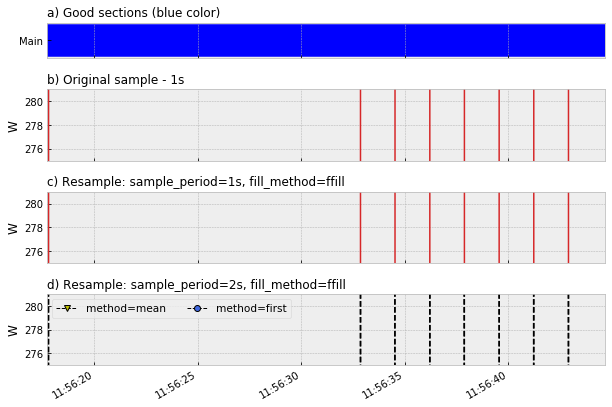

In [6]:
rcParams['figure.figsize'] = (10, 7)

#definición de fechas
ta = '2022-02-02 10:16:00+01:00'
tb = '2022-02-02 12:58:00+01:00'

#contador principal
Main=elec.select(instance=[1])

#definición de  gráficas
fig, (ax4, ax1, ax2, ax3) = plt.subplots(4, 1, sharex=True,
                                         gridspec_kw={'hspace': 0.5,'height_ratios':[1.5, 3, 3, 3]})


#sample a segundo
elec[1].power_series_all_data()[ta:tb].plot(ax=ax1, color='tab:red', marker="o", lw=1.5)
ax1.minorticks_off()
ax1.set_ylabel('W')
ax1.set_title('b) Original sample - 1s', fontsize=12, loc='left')
ax1.annotate("|10:16:00 = 277 W", xy=('2022-02-02 10:16:00+01:00', 277.6),rotation=7)
ax1.set_ylim(275,281)


#sample a 1 segundo metodo fill
elec[1].power_series_all_data(sample_period=1, resample_kwargs={'fill_method': 'ffill'})[ta:tb].plot(ax=ax2, marker="o", color='tab:red',lw=1.5)
ax2.minorticks_off()
ax2.set_ylabel('W')
ax2.set_title('c) Resample: sample_period=1s, fill_method=ffill', fontsize=12, loc='left')
ax2.annotate("|10:16:00 = 277 W", xy=('2022-02-02 10:16:00+01:00', 277.6))
ax2.set_ylim(275,281)



#sample a 2 segundos metodo fill
elec[1].power_series_all_data(sample_period=4,resample_kwargs={'how': 'first'})[ta:tb].plot(ax=ax3, color='k', lw=1.5, ls='--', marker="o",
                                                           markersize=8, markerfacecolor='royalblue')
elec[1].power_series_all_data(sample_period=4, resample_kwargs={'how': 'mean'})[ta:tb].plot(ax=ax3, color='k', lw=1.5, ls='--', marker="v",
                          markersize=8, markerfacecolor='y')
ax3.minorticks_off()
ax3.set_ylabel('W')
ax3.set_title('d) Resample: sample_period=2s, fill_method=ffill', fontsize=12, loc='left')
ax3.set_ylim(275,281)


#good sections
import matplotlib.lines as mlines
line1 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="o", markersize=6, markerfacecolor='royalblue', label='method=first')
line2 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="v", markersize=6, markerfacecolor='y', label='method=mean')
ax3.legend(handles=[line2, line1], fontsize=10.5, ncol=2)
ax4=Main.plot_good_sections(ax=ax4)
ax4.set_yticklabels(list(Meters.values()))
ax4.grid(axis='y')
ax4.set_title('a) Good sections (blue color)', fontsize=12, loc='left')
l=['11:56:20','11:56:25','11:56:30','11:56:35','11:56:40','11:56:45','11:56:50']
ax4.set_xticklabels(l, rotation=30, ha='right')

#guarda gráfico
plt.savefig('./data/images/3.1_Prepros_1.svg', bbox_inches='tight', transparent=True)
pass

## Filtros de dispositivos eléctricos

Vamos a filtrar por aquellos dispositivos cuya potencia activa sea superior a 5,85kwh

In [7]:
Devices=elec.select(instance=[2,3,4,5,6]) #MeterGroup de dispositivos
d=Devices.energy_per_meter().loc['active']  #energía kWh
d[d>5.85] #filtra dispositivos menores o iguales a 5.85 kWh (5% consumo)

5/5 ElecMeter(instance=6, building=1, dataset='dsualmh', appliances=[Appliance(type='boiler', instance=1)])nce=1)])

Series([], Name: active, dtype: float64)

Vemos  el top-k entre los dispositivos electricos conectados

In [8]:
Devices = elec.select(instance=[2,3,4,5,6])
Devices.select_top_k(k=5)

5/5 ElecMeter(instance=6, building=1, dataset='dsualmh', appliances=[Appliance(type='boiler', instance=1)])nce=1)])

MeterGroup(meters=
  ElecMeter(instance=2, building=1, dataset='dsualmh', appliances=[Appliance(type='fan', instance=1)])
  ElecMeter(instance=6, building=1, dataset='dsualmh', appliances=[Appliance(type='boiler', instance=1)])
  ElecMeter(instance=5, building=1, dataset='dsualmh', appliances=[Appliance(type='vacuum cleaner', instance=1)])
  ElecMeter(instance=4, building=1, dataset='dsualmh', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=3, building=1, dataset='dsualmh', appliances=[Appliance(type='freezer', instance=1)])
)

## División del dataset

- train: conjunto de datos de entrenamiento de modelos de desagregación
- test: conjunto de datos de validación y pruebas de modelos de desagregación

Entrenamiento:

In [9]:
train = DataSet('dsualmh.h5')

#train.set_window(start="2021-11-11 17:39:00", end="2021-11-11 17:40:00")
train.set_window(start="2022-02-02 10:16:00", end="2022-02-02 10:58:00")

train_elec=train.buildings[1].elec

train_elec.get_timeframe()

TimeFrame(start='2022-02-02 10:16:17+01:00', end='2022-02-02 10:58:00+01:00', empty=False)

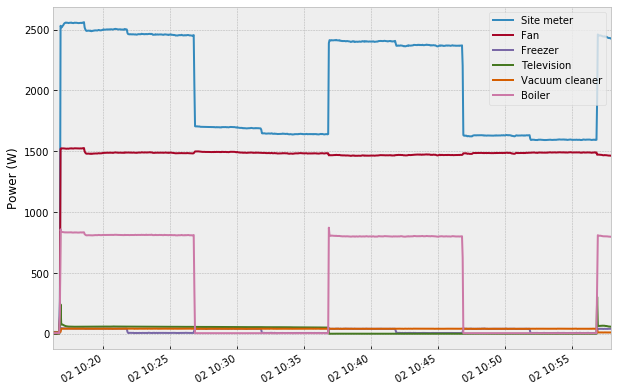

In [10]:
train_elec.plot()
#no hay datos train_elec.submeters().plot()



Validación:

In [11]:
 #Validación 

valid = DataSet('dsualmh.h5')

train.set_window(start="2022-02-02 10:58:00", end="2022-02-02 12:00:00")

valid_elec=valid.buildings[1].elec

valid_elec.get_timeframe()

TimeFrame(start='2022-02-02 10:16:17+01:00', end='2022-02-02 12:58:00+01:00', empty=False)

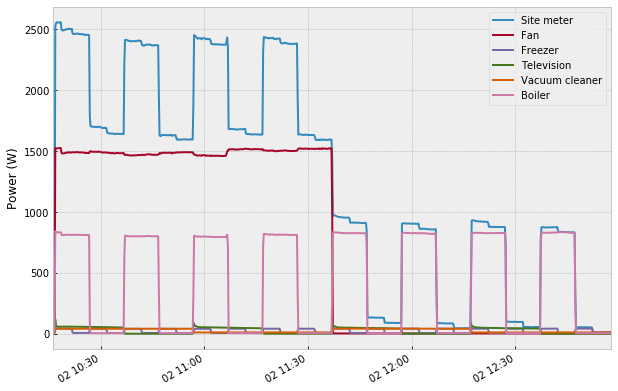

In [12]:
valid_elec.mains().plot()
valid_elec.submeters().plot()

Pruebas

In [13]:
test = DataSet('dsualmh.h5') #Pruebas

test.set_window(start="2022-02-02 10:00:00", end="2022-02-02 13:00:00")
test_elec=test.buildings[1].elec

test_elec.get_timeframe()

TimeFrame(start='2022-02-02 10:16:17+01:00', end='2022-02-02 12:58:00+01:00', empty=False)

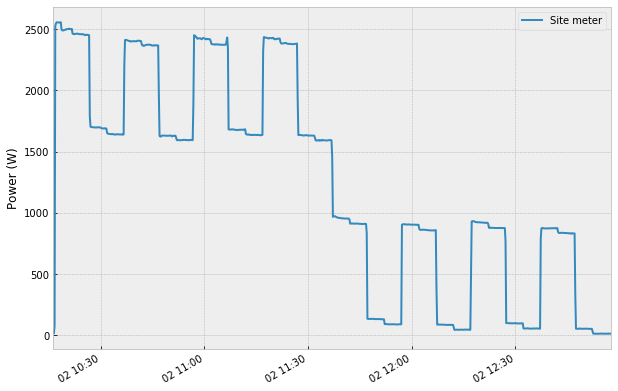

In [14]:
test_elec.mains().plot()